# Comparison of microscopic and macroscopic results in terms of the unified trajectory

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
micro_data = pd.read_pickle('../divestdata/P3/micro/unified_trajectory')
macro_data = pd.read_pickle('../divestdata/P3/res/unified_trajectory')
macro_data.index.levels

FrozenList([[1.0, 1.25, 1.5], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.1, 0.316227766017, 1.0, 3.16227766017, 10.0, 31.6227766017, 100.0, 316.227766017, 1000.0], [0.05], [0.0, 7.4297034648e-07, 1.48594069296e-06, 2.03713549999e-06, 2.35386942291e-06, 2.97188138592e-06, 4.07427099997e-06, 4.70773884581e-06, 5.94376277184e-06, 8.14854199995e-06, 9.41547769163e-06, 1.18875255437e-05, 1.62970839999e-05, 1.88309553833e-05, 2.37750510874e-05, 3.25941679998e-05, 3.76619107665e-05, 4.75501021747e-05, 6.51883359996e-05, 7.5323821533e-05, 9.51002043495e-05, 0.000130376671999, 0.000150647643066, 0.000190200408699, 0.000260753343998, 0.000301295286132, 0.000380400817398, 0.000521506687997, 0.000602590572264, 0.000760801634796, 0.00104301337599, 0.00120518114453, 0.00152160326959, 0.00208602675199, 0.00241036228906, 0.00304320653918, 0.00417205350397, 0.00482072457811, 0.00608641307837, 0.00834410700795, 0.00964144915623, 0.0121728261567, 0.0166882140159, 0.0192828983125, 0.02434

In [5]:
key = [1.25, 0.5, 1.0, 0.05]
level = ['b_d', 'phi', 'tau', 'eps']

tmax = 500

mean = micro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
sem = micro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


ma_mean = macro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
ma_sem = macro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


for i, df in enumerate([mean, sem, ma_mean, ma_sem]):
    
    columns = df.columns
    new_columns = pd.Index(['$'+col+'$' for col in columns.values], name=columns.name)
    df.columns = new_columns

def plot_var(name, mean, sem, ax, color, style, legend=True):
    
    t = mean.index.values
    m = mean[name].values
    s = sem[name].values
    
    if legend is False:
        name = '__no_label__'
    ln = ax.plot(t, m, style, color=color, label=name)
    ax.fill_between(t, m+s, m-s, alpha=.2, color=color)
    
    return ln

def legend_surrogates(styles, pos, ax):
    
    lns = []
    
    for name, style  in styles.items():
        ln = ax.plot(pos[0], pos[1], style, color='k', alpha=.5, label=name)
        lns += ln
        
    return lns

[<matplotlib.lines.Line2D object at 0x7f1423740780>, <matplotlib.lines.Line2D object at 0x7f141cbf0f60>, <matplotlib.lines.Line2D object at 0x7f141cadbf98>, <matplotlib.lines.Line2D object at 0x7f141cce8c88>]


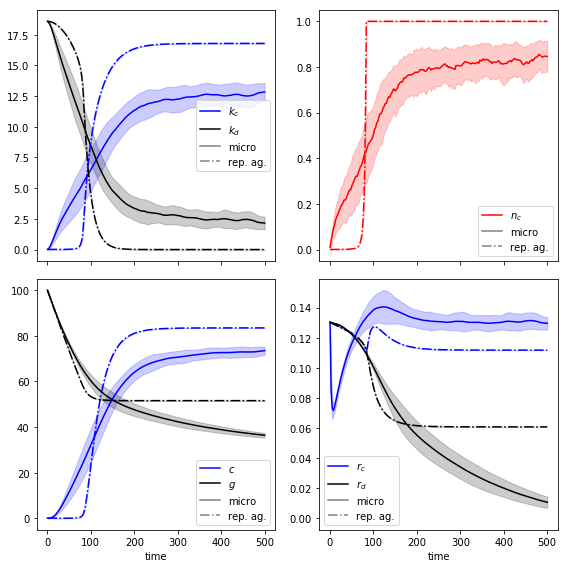

In [13]:
styles = {'micro': '-',
          'rep. ag.': '-.'}

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
plot_var('$k_c$', mean, sem, ax1, 'b', '-')
plot_var('$k_d$', mean, sem, ax1, 'k', '-')

plot_var('$k_c$', ma_mean, ma_sem, ax1, 'b', '-.', legend=False)
plot_var('$k_d$', ma_mean, ma_sem, ax1, 'k', '-.', legend=False)

ax1.set_xticklabels([])
legend_surrogates(styles, [0, 0], ax1)
plt.legend()

ax2 = fig.add_subplot(222)
plot_var('$n_c$', mean, sem, ax2, 'r', '-')
plot_var('$n_c$', ma_mean, ma_sem, ax2, 'r', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax2)
ax2.set_xticklabels([])
plt.legend(loc='lower right')

ax3 = fig.add_subplot(223)
#ax3b = ax3.twinx()
plot_var('$c$', ma_mean, ma_sem, ax3, 'b', '-.', legend=False)
plot_var('$g$', ma_mean, ma_sem, ax3, 'k', '-.', legend=False)

ln1 = plot_var('$c$', mean, sem, ax3, 'b', '-')
ln2 = plot_var('$g$', mean, sem, ax3, 'k', '-')

lns = legend_surrogates(styles, [0, 0], ax3)

lns = ln1 + ln2 + lns
print(lns)
labs = [ln.get_label() for ln in lns]

plt.legend(lns, labs, loc='lower right')

ax3.set_xlabel('time')

ax4 = fig.add_subplot(224)
plot_var('$r_c$', mean, sem, ax4, 'b', '-')
plot_var('$r_d$', mean, sem, ax4, 'k', '-')

plot_var('$r_c$', ma_mean, ma_sem, ax4, 'b', '-.', legend=False)
plot_var('$r_d$', ma_mean, ma_sem, ax4, 'k', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax4)
plt.legend()
ax4.set_xlabel('time')

fig.tight_layout()
plt.savefig('micro_vs_rep.pdf')